In [1]:
%reset -f
%matplotlib qt
import sys
import mne
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pick_ch=['P9','P7','P5','P3','PO7','PO3','O1','P10','P8','P6','P4','PO8','PO4','O2','POz','Pz']
#%load_ext autoreload
#%autoreload 2
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb
mne.__version__
mne.set_log_level("WARNING")

infolder, outfolder = find_folder()
subs = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

In [12]:
fname = op.join(outfolder,'S02_perc-epo.fif')
epochs = mne.read_epochs(fname)
a = epochs[[str(x) for x in np.arange(101,126)]]
a

<EpochsFIF  |   1100 events (all good), -0.0996094 - 1 sec, baseline off, ~303.1 MB, data loaded,
 '101': 44
 '102': 44
 '103': 44
 '104': 44
 '105': 44
 '106': 44
 '107': 44
 '108': 44
 '109': 44
 '110': 44
 '111': 44
 '112': 44
 '113': 44
 '114': 44
 '115': 44
 '116': 44
 '117': 44
 '118': 44
 '119': 44
 '120': 44
 '121': 44
 '122': 44
 '123': 44
 '124': 44
 '125': 44>

In [263]:
%run EEG_auxiliary_module.ipynb
from scipy.spatial.distance import pdist, squareform
data=list()
labels = list()
trials=4
tbins = np.arange(-0.1,0.9,0.01)
results_all=[]
for j in subs:
    fname = op.join(outfolder,f'S'+{j:.2f}+'_perc-epo.fif')
    epochs = mne.read_epochs(fname)
    #trials = len(epochs['101']) # average all trials.
    blocks=int(len(epochs['101'])/trials)
    print(blocks)
    epochs = block_average(epochs, trials, blocks, kind='perc')
    results_s=[]
    for i in tbins:
        times=(i,i+0.01)
        X, Y = convert_epochs_to_2D_array(epochs, times=times)
        confusion, duration = run_eeg_svm(X, Y, blocks)
        results_s.append(squareform(confusion))
    results_all.append(results_s)


Progress: [####################] 100.0%
The overall accuracy is 51.0 and the duration is 1.5 minutes


# Reconstruction by origin

In [22]:
a = 1
fname = op.join(outfolder, f'S{j:02}perc-epo.fif')
fname

'E:\\Ilya_study\\Analysis\\S03perc-epo.fif'

In [ ]:
%run EEG_auxiliary_module.ipynb
from scipy.spatial.distance import pdist, squareform
subs = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
data=list()
labels = list()
trials=4
tbins = np.arange(-0.1,0.9,0.01)
results_east=[]
results_west=[]
for j in subs:
    print(j)
    fname = op.join(outfolder,f'S{j:02}_perc-epo.fif')
    epochs = mne.read_epochs(fname)
    #trials = len(epochs['101']) # average all trials.
    blocks=int(len(epochs['101'])/trials)
    print(blocks)
    epochs = block_average(epochs, trials, blocks, kind='perc')
    eps = epochs[[str(x) for x in np.arange(101,126)]] 
    results_s=[]
    for i in tbins:
        times=(i,i+0.01)
        X, Y = convert_epochs_to_2D_array(eps, times=times)
        confusion, duration = run_eeg_svm(X, Y, blocks)
        results_s.append(squareform(confusion))
    results_east.append(results_s)
    
    eps = epochs[[str(x) for x in np.arange(126,151)]]
    results_s=[]
    for i in tbins:
        times=(i,i+0.01)
        X, Y = convert_epochs_to_2D_array(eps, times=times)
        confusion, duration = run_eeg_svm(X, Y, blocks)
        results_s.append(squareform(confusion))
    results_west.append(results_s)

In [31]:
results_east = np.array(results_east)
results_west = np.array(results_west)

In [44]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(np.linspace(-100, 900, num=100),east, label='east')
ax.plot(np.linspace(-100, 900, num=100),west, label='west')
ax.legend()
plt.title('Discrimination dynamics')
plt.show()

In [34]:
results_east.shape

(16, 100, 300)

In [36]:
east = np.mean(np.mean(results_east,axis=0),axis=1)
east.shape
west = np.mean(np.mean(results_west,axis=0),axis=1)
west.shape

(100,)

In [30]:
a = np.array(results_east)
np.save('sub_all_time_east.npy', a)
a = np.array(results_west)
np.save('sub_all_time_west.npy', a)


In [45]:
output=results_all.copy()
from scipy.spatial.distance import pdist, squareform
for i in range(len(results_all)):
    for b in range(len(results_all[i])):
        output[i][b]=squareform(results_all[i][b])
        
output = np.array(output)
np.save('first_2_subs_time.npy', output)

In [249]:
datain.shape
data=[]
for i in range(len(datain)):
    temp_time=[]
    for j in range(100):
        temp = squareform(datain[i,j,:])
        temp_time.append(temp)
    data.append(temp_time)
print(data[0][0].shape)

(100, 100)


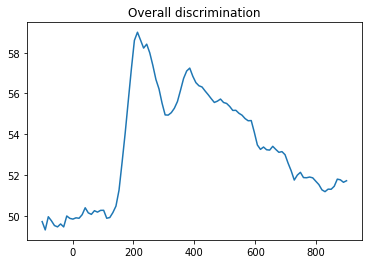

In [257]:
output = copy.deepcopy(data)
from scipy.spatial.distance import pdist, squareform
for i,item in enumerate(data):
    for j,item2 in enumerate(item):
        temp = item2
        output[i][j] = np.mean(squareform(temp))*100
output = np.array(output)
%matplotlib inline
import matplotlib.pyplot as plt
output = np.mean(output,axis=0)
plt.plot(np.linspace(-100, 900, num=100),np.transpose(output))
plt.title('Overall discrimination')
plt.show()

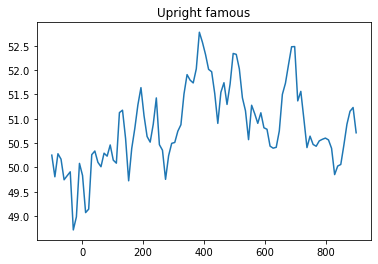

In [258]:
output = copy.deepcopy(data)
from scipy.spatial.distance import pdist, squareform
for i,item in enumerate(data):
    for j,item2 in enumerate(item):
        temp = item2[25:50,25:50]
        output[i][j] = np.mean(squareform(temp))*100
output = np.array(output)
%matplotlib inline
import matplotlib.pyplot as plt
output = np.mean(output,axis=0)
plt.plot(np.linspace(-100, 900, num=100),np.transpose(output))
plt.title('Upright famous')
plt.show()

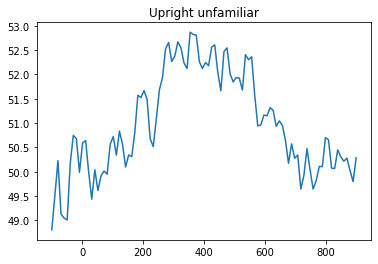

In [259]:
output = copy.deepcopy(data)
from scipy.spatial.distance import pdist, squareform
for i,item in enumerate(data):
    for j,item2 in enumerate(item):
        temp = item2[0:25,0:25]
        output[i][j] = np.mean(squareform(temp))*100
output = np.array(output)
%matplotlib inline
import matplotlib.pyplot as plt
output = np.mean(output,axis=0)
plt.plot(np.linspace(-100, 900, num=100),np.transpose(output))
plt.title('Upright unfamiliar')
plt.show()

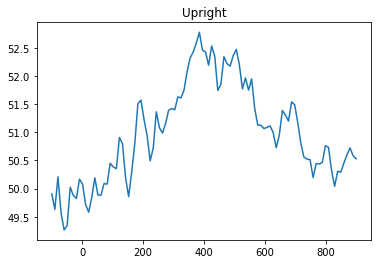

In [260]:
output = copy.deepcopy(data)
from scipy.spatial.distance import pdist, squareform
for i,item in enumerate(output):
    for j,item2 in enumerate(item):
        temp = item2[0:50,0:50]
        output[i][j] = np.mean(squareform(temp))*100
output = np.array(output)
%matplotlib inline
import matplotlib.pyplot as plt
output = np.mean(output,axis=0)
plt.plot(np.linspace(-100, 900, num=100),np.transpose(output))
plt.title('Upright')
plt.show()

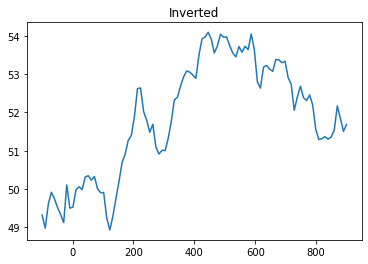

In [261]:
output = copy.deepcopy(data)
from scipy.spatial.distance import pdist, squareform
for i,item in enumerate(output):
    for j,item2 in enumerate(item):
        temp = item2[50:100,50:100]
        output[i][j] = np.mean(squareform(temp))*100
output = np.array(output)
%matplotlib inline
import matplotlib.pyplot as plt
output = np.mean(output,axis=0)
plt.plot(np.linspace(-100, 900, num=100),np.transpose(output))
plt.title('Inverted')
plt.show()

In [168]:
data[0][0]

51.9925788497217

In [ ]:
{'up unf' : [np.mean(squareform(i[0:25,0:25]))*100 for i in results],
           'up fam' : [np.mean(squareform(i[25:50,25:50]))*100 for i in results],
           'inv_unf' : [np.mean(squareform(i[50:75,50:75]))*100 for i in results],
           'inv fam' : [np.mean(squareform(i[75:100,75:100]))*100 for i in results],
           'up' : [np.mean(squareform(i[0:50,0:50]))*100 for i in results],
           'inv' : [np.mean(squareform(i[50:100,50:100]))*100 for i in results],
           'all' : [np.mean(squareform(i))*100 for i in results]}

In [82]:
data[0][0].shape

()

In [ ]:
import itertools
import numpy as np
from sklearn.preprocessing import scale
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

combs = list(itertools.combinations(np.unique(labels[0]), 2))
svm = LinearSVC(C=1)
score = list()
for i,j in enumerate(subs):
    print(j)
    this_X = data[i]
    this_Y = labels[i]
    data_temp = data.copy()
    data_temp.pop(i)
    other_X = np.concatenate(data_temp)
    labels_temp = labels.copy()
    labels_temp.pop(i)
    other_Y = np.concatenate(labels_temp)
    this_X_shape = this_X.shape
    X_temp = np.vstack((this_X,other_X))
    X_temp = scale(X_temp)
    this_X = X_temp[:this_X_shape[0],:]
    other_X = X_temp[this_X_shape[0]:,:]
    comb_score = list()
    for idx,comb in enumerate(combs):
        print(comb)
        this_X_temp_a = this_X[this_Y==comb[0],:]
        this_X_temp_b = this_X[this_Y==comb[1],:]
        this_Y_temp_a = this_Y[this_Y==comb[0]]
        this_Y_temp_b = this_Y[this_Y==comb[1]]
        other_X_temp = other_X[np.logical_or(other_Y==comb[0], other_Y==comb[1]),:]
        other_Y_temp = other_Y[np.logical_or(other_Y==comb[0], other_Y==comb[1])]
        cv_score=list()
        for m in range(this_X_temp_a.shape[0]):
            data_train_a = this_X_temp_a
            data_train_a = np.delete(data_train_a, m, axis=0)
            data_train_b = this_X_temp_b
            data_train_b = np.delete(data_train_b, m, axis=0)
            data_train = np.vstack((data_train_a,data_train_b,other_X_temp))
            targets_train_a = this_Y_temp_a
            targets_train_a = np.delete(targets_train_a, m)
            targets_train_b = this_Y_temp_b
            targets_train_b = np.delete(targets_train_b, m)
            targets_train = np.concatenate([targets_train_a,targets_train_b,other_Y_temp])
            data_test_a = this_X_temp_a[m,:]
            data_test_b = this_X_temp_b[m,:]
            data_test = np.vstack((data_test_a,data_test_b))
            targets_test=comb
            svm.fit(data_train, targets_train)
            cv_score.append(svm.score(data_test, targets_test))
            update_progress((i*idx+m) / (len(combs)*blocks*len(subs)))
        comb_score.append(cv_score)
    score.append(comb_score)

Progress: [#-------------------] 3.5%
(129, 150)


In [138]:
data1 = np.load('first_2_subs_time.npy')
data2 = np.load('first_8_subs_time.npy')

In [140]:
data1.shape

(2, 100, 4950)

In [141]:
data2.shape

(8, 100, 4950)

In [142]:
data = np.concatenate((data1, data2), axis=0)

In [144]:
datain = data.copy()

In [145]:
datain.shape

(10, 100, 4950)

In [29]:
tbins.shape

(100,)

In [160]:
data[0][0]

51.9925788497217

In [217]:
datain.shape
data=[]
for i in range(len(datain)):
    temp_time=[]
    for j in range(100):
        temp = squareform(datain[i,j,:])
        temp_time.append(temp)
    data.append(temp_time)
print(data[0][0].shape)

(100, 100)


In [218]:
import copy
output = copy.deepcopy(data)
output2 = data.copy()
#print(output == data)
print(data[0][0].shape)
print(output[0][0].shape)
print(id(output))
print(id(data))
print(output is data)


from scipy.spatial.distance import pdist, squareform
for i,item in enumerate(output):
    for j,item2 in enumerate(item):
        temp = item2[0:50,0:50]
        output[i][j] = np.mean(squareform(temp))*100
#output = np.array(output)
%matplotlib inline
print(data[0][0])
print(output2[0][0].shape)

(100, 100)
(100, 100)
35060445000
35044011208
False
[[0.         0.5        0.63636364 ... 0.63636364 0.54545455 0.59090909]
 [0.5        0.         0.5        ... 0.68181818 0.59090909 0.68181818]
 [0.63636364 0.5        0.         ... 0.36363636 0.54545455 0.5       ]
 ...
 [0.63636364 0.68181818 0.36363636 ... 0.         0.40909091 0.40909091]
 [0.54545455 0.59090909 0.54545455 ... 0.40909091 0.         0.5       ]
 [0.59090909 0.68181818 0.5        ... 0.40909091 0.5        0.        ]]
(100, 100)


In [39]:
import numpy as np
from scipy.spatial.distance import squareform
data1 = np.load('first_2_subs_time.npy')
data2 = np.load('first_8_subs_time.npy')
data3 = np.load('sub_12_time.npy')
datain = np.concatenate((data1, data2,data3), axis=0)
datain.shape
data=[]
for i in range(len(datain)):
    temp_time=[]
    for j in range(100):
        temp = squareform(datain[i,j,:])
        temp_time.append(temp)
    data.append(temp_time)
print(data[0][0].shape)

(100, 100)


In [90]:
up_fam = '25:50, 25:50'
up_unf = '0:25, 0:25'
upright = '0:50, 0:50'
inv_fam = '75:100, 75:100'
inv_unf = '50:75, 50:75'
inverted = '50:100, 50:100'

output_up_fam = select_cases(up_fam, data)
output_up_unf = select_cases(up_unf, data)
output_upright = select_cases(upright, data)
output_inv_fam = select_cases(inv_fam, data)
output_inv_unf = select_cases(inv_unf, data)
output_inverted = select_cases(inverted, data)


In [89]:
def select_cases(string, data):
    import copy
    from scipy.spatial.distance import squareform
    datain = copy.deepcopy(data)
    for i,item in enumerate(datain):
        for j,item2 in enumerate(item):
            a='item2['+string+']'
            temp = eval(a)
            datain[i][j] = np.mean(squareform(temp))*100
    datain = np.array(datain)
    datain = pd.DataFrame({'Accuracy (%)':datain.ravel(),'time':np.tile(np.linspace(-100, 900, num=100),datain.shape[0])})
    return datain

In [92]:
# Figure
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
ax = plt.axes()
sns.relplot(x='time', y="Accuracy (%)", kind = 'line', data=output_up_fam, ax=ax, color = 'r')
sns.relplot(x='time', y="Accuracy (%)", kind = 'line', data=output_up_unf, ax=ax, color = 'g')
plt.setp(ax.lines[0], label = 'upright famous')
plt.setp(ax.lines[1], label = 'upright unfamiliar')
ax.set_xlim(-100, 900)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,fontsize=20)
plt.ylabel('Accuracy (%)')
plt.show()

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
ax = plt.axes()
sns.relplot(x='time', y="Accuracy (%)", kind = 'line', data=output_inv_fam, ax=ax, color = 'r')
sns.relplot(x='time', y="Accuracy (%)", kind = 'line', data=output_inv_unf, ax=ax, color = 'g')
plt.setp(ax.lines[0], label = 'inverted famous')
plt.setp(ax.lines[1], label = 'inverted unfamiliar')
ax.set_xlim(-100, 900)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,fontsize=20)
plt.ylabel('Accuracy (%)')
plt.show()

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
ax = plt.axes()
sns.relplot(x='time', y="Accuracy (%)", kind = 'line', data=output_upright, ax=ax, color = 'g')
sns.relplot(x='time', y="Accuracy (%)", kind = 'line', data=output_inverted, ax=ax, color = 'purple')
plt.setp(ax.lines[0], label = 'upright')
plt.setp(ax.lines[1], label = 'inverted')
ax.set_xlim(-100, 900)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,fontsize=20)
plt.ylabel('Accuracy (%)')
plt.show()